# Tugas 3 Decision Tree 


-

Nama : **Muhammad Adam Zaky Jiddyansah**

NIM  : **210411100234**


-


##Penjelasan

>Secara umum, Pohon keputusan / Decision Tree atau merupakan metode klasifikasi menjadi salah satu yang terpopuler karena mudah dipahami. Pohon keputusan adalah metode pengambilan keputusan yang menyusun setiap opsi menjadi bentuk yang bercabang. Dengan begitu membuat metode ini disebut pohon keputusan.(Sumber Wikipedia) 

> Di Data Mining, Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko.

---

##Tugas yang diberikan :

**Buat pohon keputusan dengan scikit learn**

*   Bentuk pohon keputusan dari data iris dengan split dataset training dan testing 0.8/0.2
*   Berikan penjelasan proses decara detail
*   Bandingkan hasilnya dengan k-nn dan naive bayes
*   hasilnya di upload di repository masig masing 


Pertama yaitu mengimport module yang digunakan untuk membantu pengelolahan data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

Mengambil / membaca data Iris

In [3]:
url = "https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv"
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

##Split Dataset Trainning dan Test dengan perbandingan 0.8/0.2

Memakai module train_test_split

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
d3 = DecisionTreeClassifier()
d3.fit(X_train, y_train)

DecisionTreeClassifier()

##Membuat grafik Pohon Keputusan

Dibagian ini menggunakan module graphiz untuk membuat grafik/menggambarkan pohon keputusan yang merender data Iris

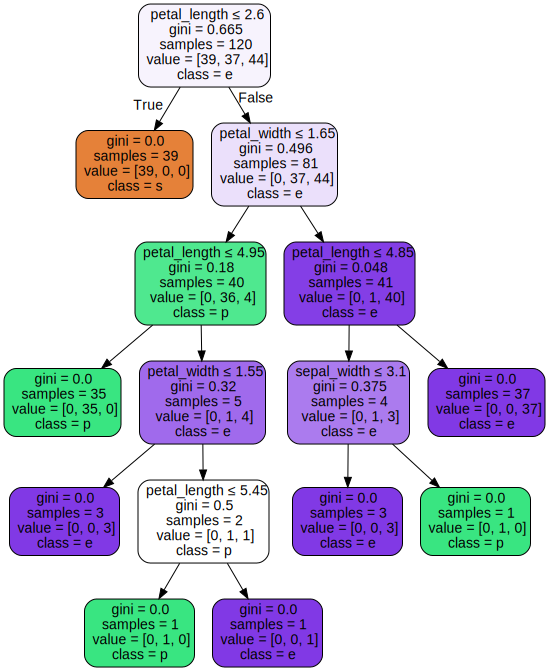

In [7]:
import graphviz 
dot_data =export_graphviz(d3, out_file=None, feature_names=df.columns[:-1], class_names=df.columns[-1],  filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

Selanjutnya langkah perhitungan predik

In [8]:
y_predic = d3.predict(X_test)
y_predic

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [9]:
data_predic = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_predic, columns=["Predict"]).reset_index(drop=True)], axis=1)
data_predic

,species,Predict
0,setosa,setosa
1,versicolor,versicolor
2,versicolor,versicolor
3,setosa,setosa
4,virginica,virginica
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,setosa,setosa
9,virginica,virginica


In [17]:
correct = data_predic.loc[data_predic["species"] == data_predic["Predict"]]

Hasil pengolahan data :

In [18]:
from sklearn.metrics import accuracy_score
print(f'acuraty = {"{:,.2f}".format(accuracy_score(y_test, y_predic)*100)}%')
print(f'dari data prediksi {correct.shape[0]} / {data_predic.shape[0]} * 100% = {"{:,.2f}".format((correct.shape[0]) / (data_predic.shape[0]) * 100)}%' )

acuraty = 96.67%
dari data prediksi 29 / 30 * 100% = 96.67%
